# Data Analytics Project - Backtesting Model Predictions

# BEML STOCK MODELS EVALUATION

---

# 1. Importing Required Modules

In [1]:
import pandas as pd

# 2. Get required datasets

## 2.1. Get the orders dataset of BEML

In [2]:
orders_df = pd.read_csv('../Preprocess/Pair2/Pair2_orders.csv')
orders_df.head()

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
1,2018-08-07,868.599976,873.700012,-5.100037,0.672698,FLAT
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
3,2018-08-09,810.150024,878.750000,-68.599976,-1.462939,FLAT
4,2018-08-10,807.750000,865.250000,-57.500000,-1.089624,FLAT


In [3]:
orders_df.tail()

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
54,2018-10-29,561.150024,591.450012,-30.299988,-0.174830,FLAT
55,2018-10-30,585.650024,603.950012,-18.299988,0.228756,FLAT
56,2018-10-31,587.250000,627.000000,-39.750000,-0.492654,FLAT
57,2018-11-01,632.400024,674.450012,-42.049988,-0.570007,FLAT
58,2018-11-02,688.900024,676.000000,12.900024,1.278078,FLAT


## 2.2. Visualize the orders

Text(0, 0.5, 'zscore')

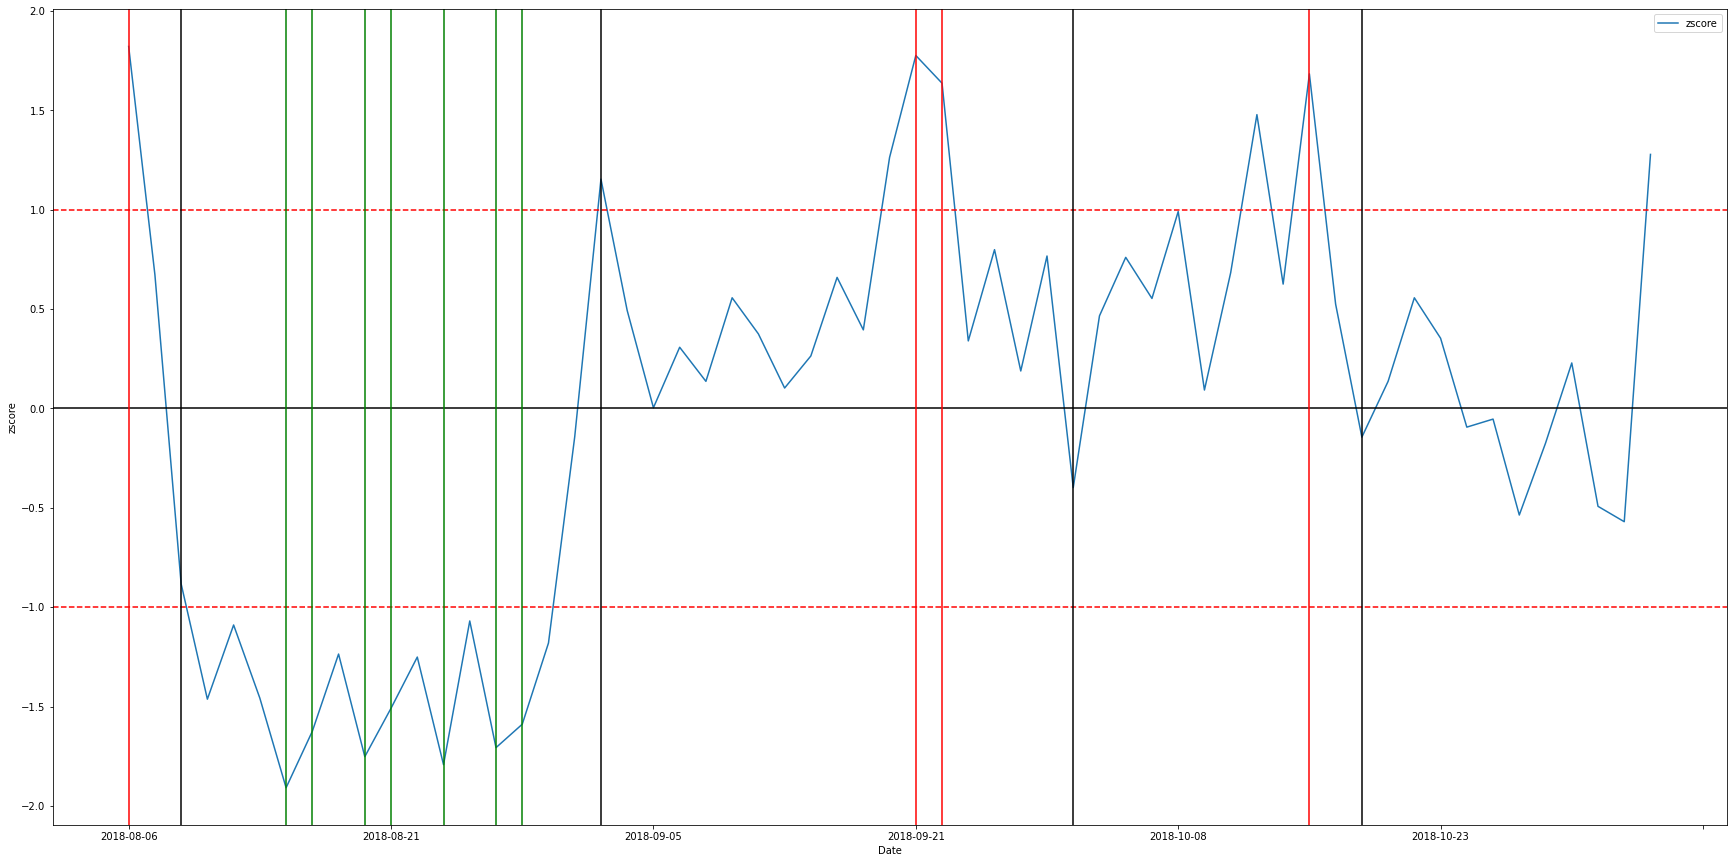

In [4]:
# Plotting the zscore of the Spread
orders_plt = orders_df.plot(x='Date', y='zscore', figsize=(30,15))

# Plotting the lines at mean, 1 and 2 std. dev.
orders_plt.axhline(0, c='black')
orders_plt.axhline(1, c='red', ls = "--")
orders_plt.axhline(-1, c='red', ls = "--")

# Extracting orders
Orders = orders_df['Orders']

# Plot vertical lines where orders are placed
for order in range(len(Orders)):
    
    if Orders[order] != "FLAT":
        
        # GREEN line for a long position
        if Orders[order] == "LONG":
            orders_plt.axvline(x=order, c = "green")
        
        # RED line for a short position
        elif Orders[order] == "SHORT":
            orders_plt.axvline(x=order, c = "red")
        
        # BLACK line for getting out of all positions at that point
        else:
            orders_plt.axvline(x=order, c = "black")

orders_plt.set_ylabel("zscore")

__In the figure above:__
- __Blue line__ - zscore of the Spread
- __Black horizontal line__ at 0 - Mean
- __Red dotted horizontal lines__ - at +1 and -1 standard deviations
- __Green vertical line__ - represents long position taken on that day
- __Red vertical line__ - represents short position taken on that day
- __Black vertical line__ - represents getting out of all open positions till that point


## 2.3. Get the predicitions dataset of BEML

In [5]:
predictions = pd.read_csv("../Models/Pair2/Beml_predicitions.csv")
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
0,2018-08-06,909.099976,762.413834,793.382360,NaN
1,2018-08-07,868.599976,755.794835,786.817999,NaN
2,2018-08-08,825.150024,749.175836,801.045660,NaN
3,2018-08-09,810.150024,742.556836,793.949767,NaN
4,2018-08-10,807.750000,747.687468,784.870888,NaN


In [6]:
predictions = predictions.dropna()
predictions.head()

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
10,2018-08-21,829.599976,713.104104,794.303382,745.86650
11,2018-08-23,824.250000,699.866106,803.470188,741.99590
12,2018-08-24,813.250000,704.996738,805.415475,738.63600
13,2018-08-27,831.700012,698.377738,807.914918,732.58344
14,2018-08-28,819.500000,691.758739,817.699129,723.58370


## 2.4 Visualize the predictions by different models

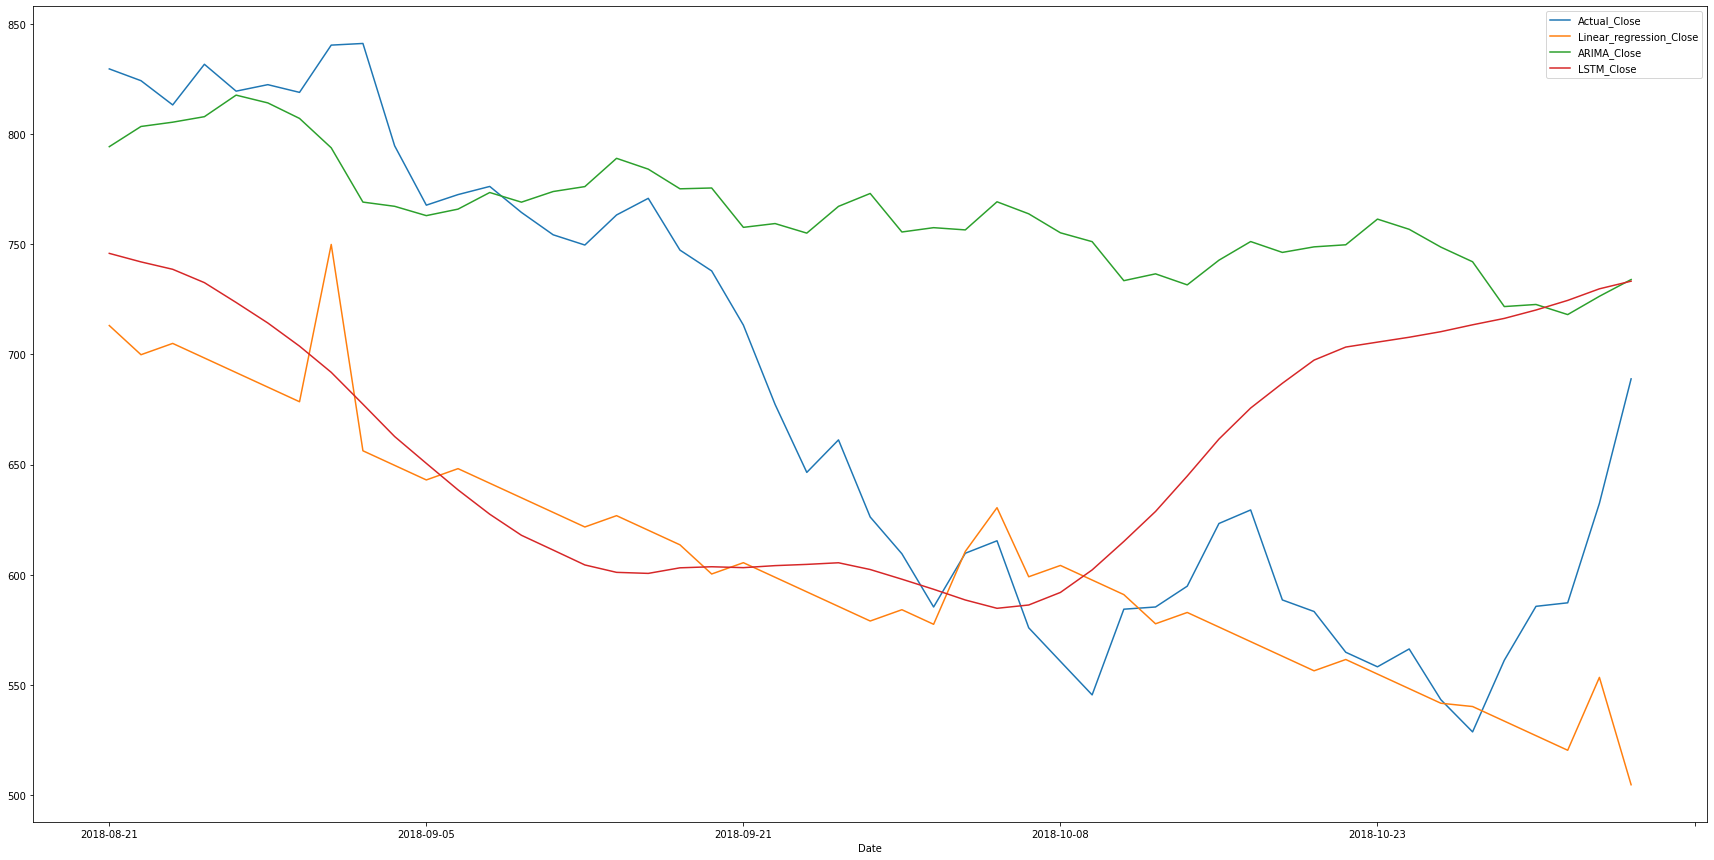

In [7]:
predictions.plot(x='Date', y=['Actual_Close', 'Linear_regression_Close', 'ARIMA_Close', 'LSTM_Close'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Price in rupees
- __Blue line__ - Actual data in the time period of correlation
- __Orange line__ - Linear Regression predictions for the time period
- __Red line__ - LSTM predictions for the time period
- __Green line__ - ARIMA predictions for the time period


---

# 3. Set parameters of trading

In [8]:
CAPITAL = 1000000
RISK = 20000 # Max risk allowed per trade (2% of capital)

- CAPITAL - Total amout of money willing to be spent.
- RISK - Amount to spend per trade (maximum).
- OPEN POSITION - Buy/Short shares of stock worth 20000.
- CLOSE POSITION - Buy/Sell shares to consolidate open positions and take profit/loss.
- TRADE_BOOK - Keeps track of all open positions.
- For the purpose of this experiment, we assume no brokerage costs, which is a fair assumption as many brokers (such as zerodha, robinhood, sharekhan, etc.) offer equity delivery at no cost.

---

# 4. Evaluate all individual orders

## 4.1. Display all orders which are not *FLAT*

In [9]:
not_flat_orders = orders_df[orders_df['Orders'] != 'FLAT']
not_flat_orders

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
2,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
6,2018-08-14,793.950012,875.799988,-81.849976,-1.908565,LONG
7,2018-08-16,796.099976,869.500000,-73.400024,-1.624375,LONG
9,2018-08-20,814.000000,891.200012,-77.200012,-1.752177,LONG
10,2018-08-21,829.599976,899.549988,-69.950012,-1.508344,LONG
12,2018-08-24,813.250000,891.650024,-78.400024,-1.792536,LONG
14,2018-08-28,819.500000,895.349976,-75.849976,-1.706772,LONG
15,2018-08-29,822.450012,894.799988,-72.349976,-1.589060,LONG
18,2018-09-03,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION


In [10]:
not_flat_orders = not_flat_orders.set_index('Date').reset_index()
not_flat_orders

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
1,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
2,2018-08-14,793.950012,875.799988,-81.849976,-1.908565,LONG
3,2018-08-16,796.099976,869.500000,-73.400024,-1.624375,LONG
4,2018-08-20,814.000000,891.200012,-77.200012,-1.752177,LONG
5,2018-08-21,829.599976,899.549988,-69.950012,-1.508344,LONG
6,2018-08-24,813.250000,891.650024,-78.400024,-1.792536,LONG
7,2018-08-28,819.500000,895.349976,-75.849976,-1.706772,LONG
8,2018-08-29,822.450012,894.799988,-72.349976,-1.589060,LONG
9,2018-09-03,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION


## 4.2 Flip all orders

In [11]:
def flip_orders(orders):
    
    flipped_orders = []
    
    for order in orders:
        if order == 'SHORT':
            flipped_orders.append('LONG')
        elif order == 'LONG':
            flipped_orders.append('SHORT')
        else:
            flipped_orders.append(order)
    
    return flipped_orders


In [12]:
# not_flat_orders['Orders'] = flip_orders(not_flat_orders['Orders'])
not_flat_orders

,Date,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
0,2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
1,2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
2,2018-08-14,793.950012,875.799988,-81.849976,-1.908565,LONG
3,2018-08-16,796.099976,869.500000,-73.400024,-1.624375,LONG
4,2018-08-20,814.000000,891.200012,-77.200012,-1.752177,LONG
5,2018-08-21,829.599976,899.549988,-69.950012,-1.508344,LONG
6,2018-08-24,813.250000,891.650024,-78.400024,-1.792536,LONG
7,2018-08-28,819.500000,895.349976,-75.849976,-1.706772,LONG
8,2018-08-29,822.450012,894.799988,-72.349976,-1.589060,LONG
9,2018-09-03,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION


- As BEML is the stock with the higher price value, in pair trading we need to take the position opposite to the one we take on the larger stock. Hence the positions to take are __NOT__ flipped.

## 4.3. Get predictions of dates where orders are placed

### 4.3.1. Filter rows in predictions to only include dates where orders are placed

In [13]:
not_flat_orders = not_flat_orders.set_index('Date')
not_flat_orders

,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
Date,,,,,
2018-08-06,909.099976,880.049988,29.049988,1.821236,SHORT
2018-08-08,825.150024,876.500000,-51.349976,-0.882785,GET_OUT_OF_POSITION
2018-08-14,793.950012,875.799988,-81.849976,-1.908565,LONG
2018-08-16,796.099976,869.500000,-73.400024,-1.624375,LONG
2018-08-20,814.000000,891.200012,-77.200012,-1.752177,LONG
2018-08-21,829.599976,899.549988,-69.950012,-1.508344,LONG
2018-08-24,813.250000,891.650024,-78.400024,-1.792536,LONG
2018-08-28,819.500000,895.349976,-75.849976,-1.706772,LONG
2018-08-29,822.450012,894.799988,-72.349976,-1.589060,LONG


In [14]:
predicitions = predictions.set_index('Date')
predicitions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close
Date,,,,
2018-08-21,829.599976,713.104104,794.303382,745.86650
2018-08-23,824.250000,699.866106,803.470188,741.99590
2018-08-24,813.250000,704.996738,805.415475,738.63600
2018-08-27,831.700012,698.377738,807.914918,732.58344
2018-08-28,819.500000,691.758739,817.699129,723.58370
2018-08-29,822.450012,685.139740,814.167154,714.26760
2018-08-30,818.950012,678.520740,807.119904,703.75470
2018-08-31,840.400024,749.913919,793.782101,691.87120
2018-09-03,841.150024,656.255927,769.144257,677.40360


In [15]:
orders_predictions = predicitions.join(not_flat_orders)
orders_predictions = orders_predictions.dropna()
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,BEML_Close,ESCORTS_Close,Spread,zscore,Orders
Date,,,,,,,,,
2018-08-21,829.599976,713.104104,794.303382,745.86650,829.599976,899.549988,-69.950012,-1.508344,LONG
2018-08-24,813.250000,704.996738,805.415475,738.63600,813.250000,891.650024,-78.400024,-1.792536,LONG
2018-08-28,819.500000,691.758739,817.699129,723.58370,819.500000,895.349976,-75.849976,-1.706772,LONG
2018-08-29,822.450012,685.139740,814.167154,714.26760,822.450012,894.799988,-72.349976,-1.589060,LONG
2018-09-03,841.150024,656.255927,769.144257,677.40360,841.150024,831.950012,9.200012,1.153639,GET_OUT_OF_POSITION
2018-09-21,713.299988,605.457829,757.679160,603.20690,713.299988,685.599976,27.700012,1.775833,SHORT
2018-09-24,677.299988,598.838830,759.396492,604.12680,677.299988,653.750000,23.549988,1.636259,SHORT
2018-10-01,585.349976,577.493465,757.531869,593.38960,585.349976,622.299988,-36.950012,-0.398484,GET_OUT_OF_POSITION
2018-10-15,623.250000,576.240502,742.770403,661.56866,623.250000,598.299988,24.950012,1.683345,SHORT


### 4.3.2 Remove columns in orders and predictions dataframe

In [16]:
orders_predictions = orders_predictions.drop(columns=['BEML_Close', 'ESCORTS_Close', 'Spread', 'zscore'])
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-08-21,829.599976,713.104104,794.303382,745.86650,LONG
2018-08-24,813.250000,704.996738,805.415475,738.63600,LONG
2018-08-28,819.500000,691.758739,817.699129,723.58370,LONG
2018-08-29,822.450012,685.139740,814.167154,714.26760,LONG
2018-09-03,841.150024,656.255927,769.144257,677.40360,GET_OUT_OF_POSITION
2018-09-21,713.299988,605.457829,757.679160,603.20690,SHORT
2018-09-24,677.299988,598.838830,759.396492,604.12680,SHORT
2018-10-01,585.349976,577.493465,757.531869,593.38960,GET_OUT_OF_POSITION
2018-10-15,623.250000,576.240502,742.770403,661.56866,SHORT


### 4.3.3 Create function to evaluate orders

In [17]:
def evaluate_orders(orders_df):
    
    actual_profits = []
    LR_profits = []
    ARIMA_profits = []
    LSTM_profits = []
    shares = []
    
    num_orders = len(orders_df["Orders"])
    
    for i in range(num_orders):
        
        if i == num_orders - 1:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
            break
        
        position = orders_df['Orders'][i]
        close = orders_df['Actual_Close'][i]
        LR_close = orders_df['Linear_regression_Close'][i]
        ARIMA_close = orders_df['ARIMA_Close'][i]
        LSTM_close = orders_df['LSTM_Close'][i]
        
        print()
        
        print("ORDER: ", i, close, LR_close, ARIMA_close, LSTM_close, position)
        
        if position == 'LONG' or position == 'SHORT':
            
            no_of_shares = 20000//close
            
            for j in range(i+1, num_orders):
                
                if (j == num_orders - 1) or orders_df['Orders'][j] == 'GET_OUT_OF_POSITION':
                    
                    actual_profit = orders_df['Actual_Close'][j] - orders_df['Actual_Close'][i]
                    LR_profit = orders_df['Linear_regression_Close'][j] - orders_df['Linear_regression_Close'][i]
                    ARIMA_profit = orders_df['ARIMA_Close'][j] - orders_df['ARIMA_Close'][i]
                    LSTM_profit = orders_df['LSTM_Close'][j] - orders_df['LSTM_Close'][i]
                    
                    actual_profit *= no_of_shares
                    LR_profit *= no_of_shares
                    ARIMA_profit *= no_of_shares
                    LSTM_profit  *= no_of_shares
                    
                    if position == 'SHORT':
                        actual_profit *= -1
                        LR_profit *= -1
                        ARIMA_profit *= -1
                        LSTM_profit *= -1
                    
                    print('number of shares: ', no_of_shares)
                    print('actual profit: ', actual_profit)
                    print('LR profit: ', LR_profit)
                    print('ARIMA profit: ', ARIMA_profit)
                    print('LSTM profit: ', LSTM_profit)
                    
                    shares.append(no_of_shares)
                    actual_profits.append(actual_profit)
                    LR_profits.append(LR_profit)
                    ARIMA_profits.append(ARIMA_profit)
                    LSTM_profits.append(LSTM_profit)
                    
                    break
        else:
            actual_profits.append(0)
            LR_profits.append(0)
            ARIMA_profits.append(0)
            LSTM_profits.append(0)
            shares.append(0)
        
        print()
    
    return actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares
                    

In [18]:
actual_profits, LR_profits, ARIMA_profits, LSTM_profits, shares = evaluate_orders(orders_predictions)


ORDER:  0 829.5999755859375 713.1041044560261 794.303382071539 745.8665 LONG
number of shares:  24.0
actual profit:  277.201171875
LR profit:  -1364.3562680706382
ARIMA profit:  -603.8190105122712
LSTM profit:  -1643.1095999999998


ORDER:  1 813.25 704.9967378284782 805.4154752070531 738.6360000000001 LONG
number of shares:  24.0
actual profit:  669.6005859375
LR profit:  -1169.7794690094888
ARIMA profit:  -870.5092457646097
LSTM profit:  -1469.5776000000023


ORDER:  2 819.5 691.7587391622365 817.699129296155 723.5837 LONG
number of shares:  24.0
actual profit:  519.6005859375
LR profit:  -852.0675010196865
ARIMA profit:  -1165.3169439030553
LSTM profit:  -1108.322400000001


ORDER:  3 822.4500122070312 685.1397398291156 814.1671541271496 714.2676 LONG
number of shares:  24.0
actual profit:  448.80029296875
LR profit:  -693.2115170247853
ARIMA profit:  -1080.5495398469266
LSTM profit:  -884.7360000000008


ORDER:  4 841.1500244140625 656.2559266197495 769.1442566335277 677.4036 GET_

In [19]:
actual_profits

[277.201171875,
 669.6005859375,
 519.6005859375,
 448.80029296875,
 0,
 3582.600341796875,
 2666.5503540039062,
 0,
 1110.400390625,
 0]

In [20]:
LR_profits

[-1364.3562680706382,
 -1169.7794690094888,
 -852.0675010196865,
 -693.2115170247853,
 0,
 783.0022095534982,
 619.0155935199033,
 0,
 423.6159573197365,
 0]

In [21]:
LSTM_profits

[-1643.1095999999998,
 -1469.5776000000023,
 -1108.322400000001,
 -884.7360000000008,
 0,
 274.8844000000013,
 311.37880000000087,
 0,
 -810.3724800000018,
 0]

In [22]:
shares

[24.0, 24.0, 24.0, 24.0, 0, 28.0, 29.0, 0, 32.0, 0]

In [23]:
ARIMA_profits

[-603.8190105122712,
 -870.5092457646097,
 -1165.3169439030553,
 -1080.5495398469266,
 0,
 4.124135279307211,
 54.07404863514125,
 0,
 -113.08254057307204,
 0]

### 4.3.4 Adding evaluated orders to dataframe

In [24]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders
Date,,,,,
2018-08-21,829.599976,713.104104,794.303382,745.86650,LONG
2018-08-24,813.250000,704.996738,805.415475,738.63600,LONG
2018-08-28,819.500000,691.758739,817.699129,723.58370,LONG
2018-08-29,822.450012,685.139740,814.167154,714.26760,LONG
2018-09-03,841.150024,656.255927,769.144257,677.40360,GET_OUT_OF_POSITION
2018-09-21,713.299988,605.457829,757.679160,603.20690,SHORT
2018-09-24,677.299988,598.838830,759.396492,604.12680,SHORT
2018-10-01,585.349976,577.493465,757.531869,593.38960,GET_OUT_OF_POSITION
2018-10-15,623.250000,576.240502,742.770403,661.56866,SHORT


In [25]:
orders_predictions['Shares'] = shares
orders_predictions['Actual_profit'] = actual_profits
orders_predictions['Linear_regression_profit'] = LR_profits
orders_predictions['ARIMA_profit'] = ARIMA_profits
orders_predictions['LSTM_profit'] = LSTM_profits

In [26]:
orders_predictions

,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
Date,,,,,,,,,,
2018-08-21,829.599976,713.104104,794.303382,745.86650,LONG,24.0,277.201172,-1364.356268,-603.819011,-1643.10960
2018-08-24,813.250000,704.996738,805.415475,738.63600,LONG,24.0,669.600586,-1169.779469,-870.509246,-1469.57760
2018-08-28,819.500000,691.758739,817.699129,723.58370,LONG,24.0,519.600586,-852.067501,-1165.316944,-1108.32240
2018-08-29,822.450012,685.139740,814.167154,714.26760,LONG,24.0,448.800293,-693.211517,-1080.549540,-884.73600
2018-09-03,841.150024,656.255927,769.144257,677.40360,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-09-21,713.299988,605.457829,757.679160,603.20690,SHORT,28.0,3582.600342,783.002210,4.124135,274.88440
2018-09-24,677.299988,598.838830,759.396492,604.12680,SHORT,29.0,2666.550354,619.015594,54.074049,311.37880
2018-10-01,585.349976,577.493465,757.531869,593.38960,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
2018-10-15,623.250000,576.240502,742.770403,661.56866,SHORT,32.0,1110.400391,423.615957,-113.082541,-810.37248


### 4.3.5 Visualizing the profits

In [27]:
orders_predictions = orders_predictions.reset_index()

In [28]:
orders_predictions

,Date,Actual_Close,Linear_regression_Close,ARIMA_Close,LSTM_Close,Orders,Shares,Actual_profit,Linear_regression_profit,ARIMA_profit,LSTM_profit
0,2018-08-21,829.599976,713.104104,794.303382,745.86650,LONG,24.0,277.201172,-1364.356268,-603.819011,-1643.10960
1,2018-08-24,813.250000,704.996738,805.415475,738.63600,LONG,24.0,669.600586,-1169.779469,-870.509246,-1469.57760
2,2018-08-28,819.500000,691.758739,817.699129,723.58370,LONG,24.0,519.600586,-852.067501,-1165.316944,-1108.32240
3,2018-08-29,822.450012,685.139740,814.167154,714.26760,LONG,24.0,448.800293,-693.211517,-1080.549540,-884.73600
4,2018-09-03,841.150024,656.255927,769.144257,677.40360,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
5,2018-09-21,713.299988,605.457829,757.679160,603.20690,SHORT,28.0,3582.600342,783.002210,4.124135,274.88440
6,2018-09-24,677.299988,598.838830,759.396492,604.12680,SHORT,29.0,2666.550354,619.015594,54.074049,311.37880
7,2018-10-01,585.349976,577.493465,757.531869,593.38960,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000
8,2018-10-15,623.250000,576.240502,742.770403,661.56866,SHORT,32.0,1110.400391,423.615957,-113.082541,-810.37248
9,2018-10-17,588.549988,563.002503,746.304233,686.89280,GET_OUT_OF_POSITION,0.0,0.000000,0.000000,0.000000,0.00000


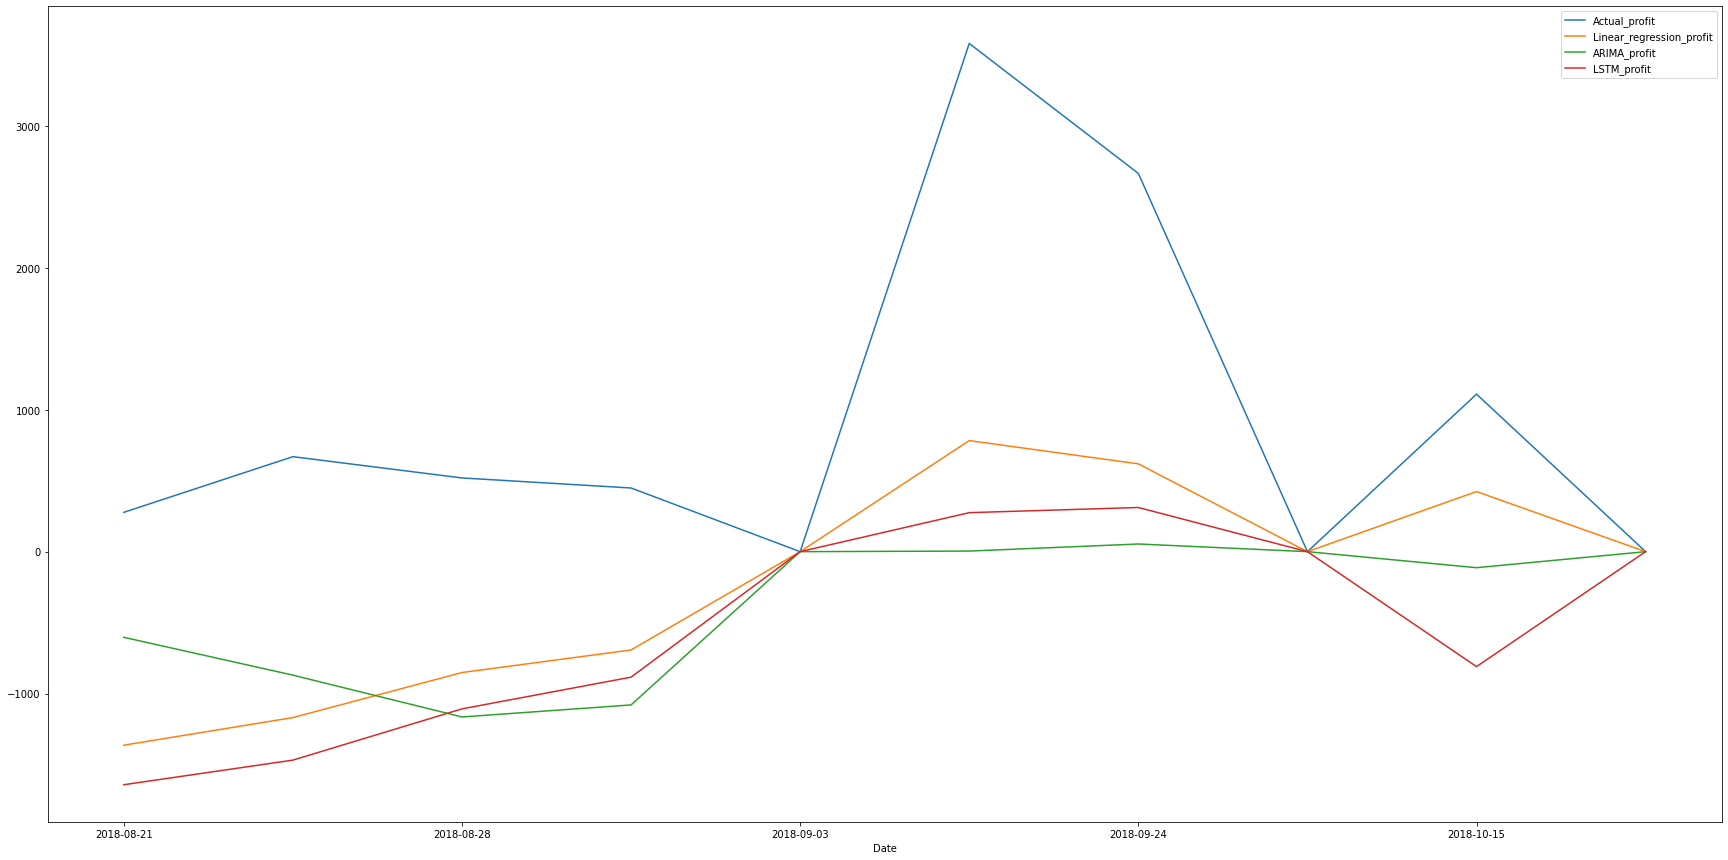

In [29]:
orders_predictions.plot(x='Date', y=['Actual_profit', 'Linear_regression_profit', 'ARIMA_profit', 'LSTM_profit'], figsize=(30,15))

__In the figure above:__
- __x-axis__ - Date
- __y-axis__ - Profit
- __Blue line__ - Actual profit
- __Orange line__ - Linear Regression predicted profit
- __Green line__ - ARIMA predicted profit
- __Red line__ - LSTM predicted profit

---